# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


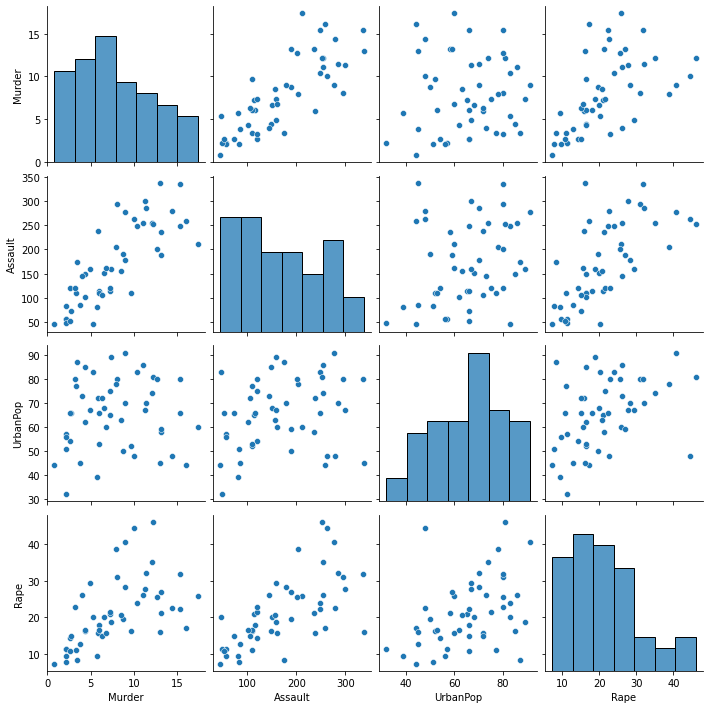

In [6]:
sns.pairplot(df);

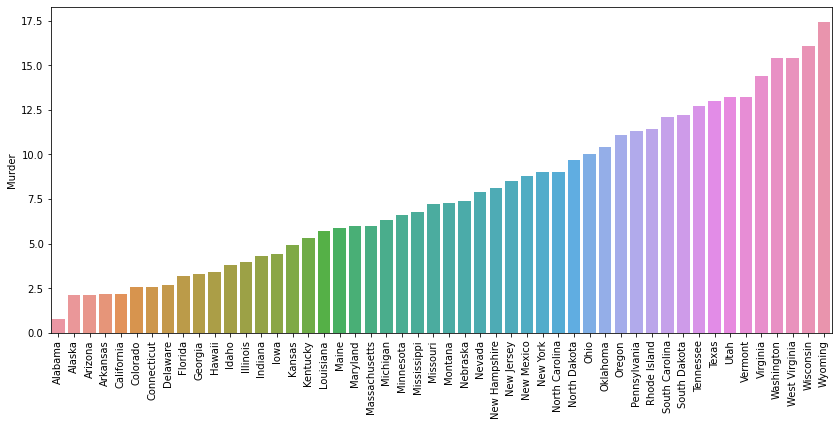

In [7]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Murder", x = df.index, data = df, order = df.Murder.values.sort())
plt.xticks(rotation = 90);

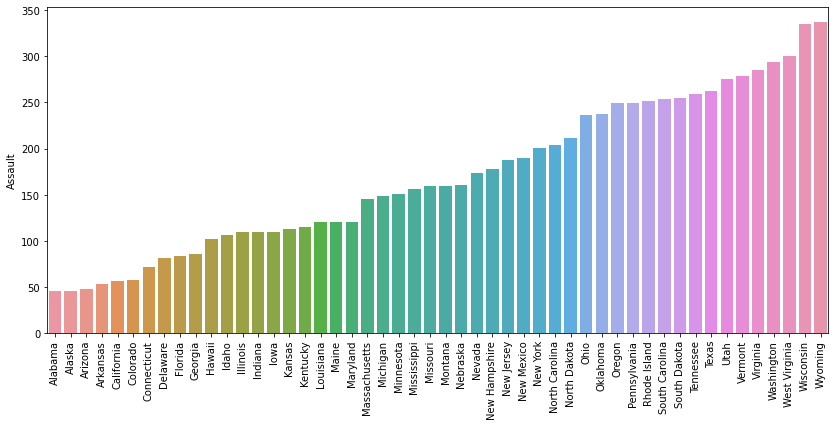

In [8]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Assault", x = df.index, data = df, order = df.Assault.values.sort())
plt.xticks(rotation = 90);

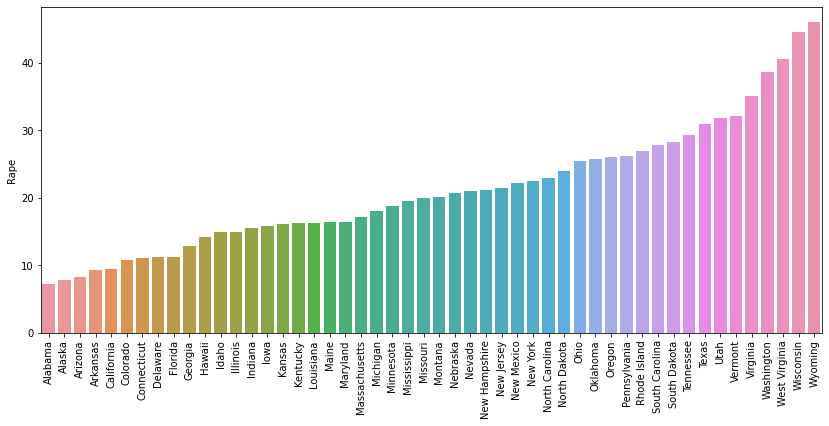

In [9]:
plt.figure(figsize = (14,6))
sns.barplot(y = "Rape", x = df.index, data = df, order = df.Rape.values.sort())
plt.xticks(rotation = 90);

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [10]:
#!pip install pyclustertend

In [4]:
from pyclustertend import hopkins

In [5]:
hopkins(df, df.shape[0])

0.41138200329431396

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

# scale : mean columun meani oluyor ve etrafına standar sapmasını kullnarak dağıtıyor

In [7]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [8]:
hopkins(scale(df1), df1.shape[0])

0.37307320927264964

In [9]:
hopkins(MinMaxScaler().fit_transform(df2), df2.shape[0])

0.3997978418086156

In [10]:
hopkins(StandardScaler().fit_transform(df3), df3.shape[0])

0.3786555901522846

In [11]:
scaler = MinMaxScaler()

In [12]:
df_scaled = scaler.fit_transform(df)

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [14]:
hc_ward = linkage(y = df, method = "ward")
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

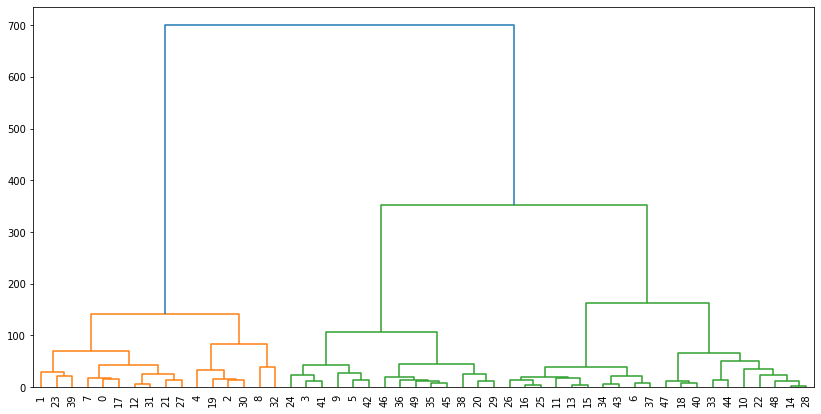

In [15]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

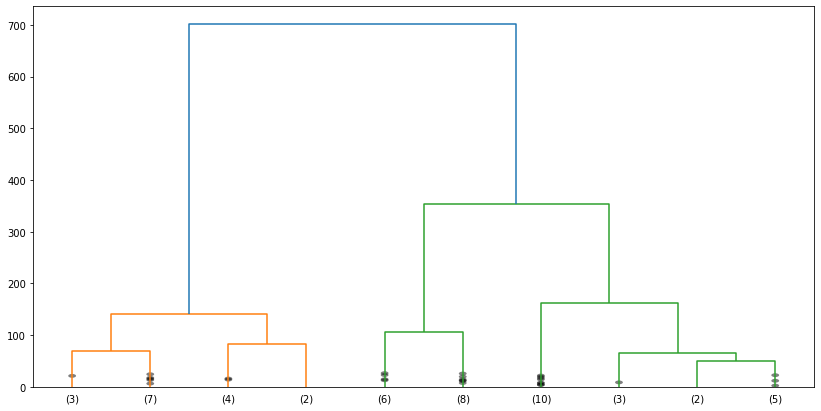

In [21]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,   # 10 cluster olacak şekilde dallanmayı belirliyor. bunu değiştirip yazdığın cluster sayısı kadarını gösterebilir.
           show_contracted = True,
           leaf_font_size = 10);

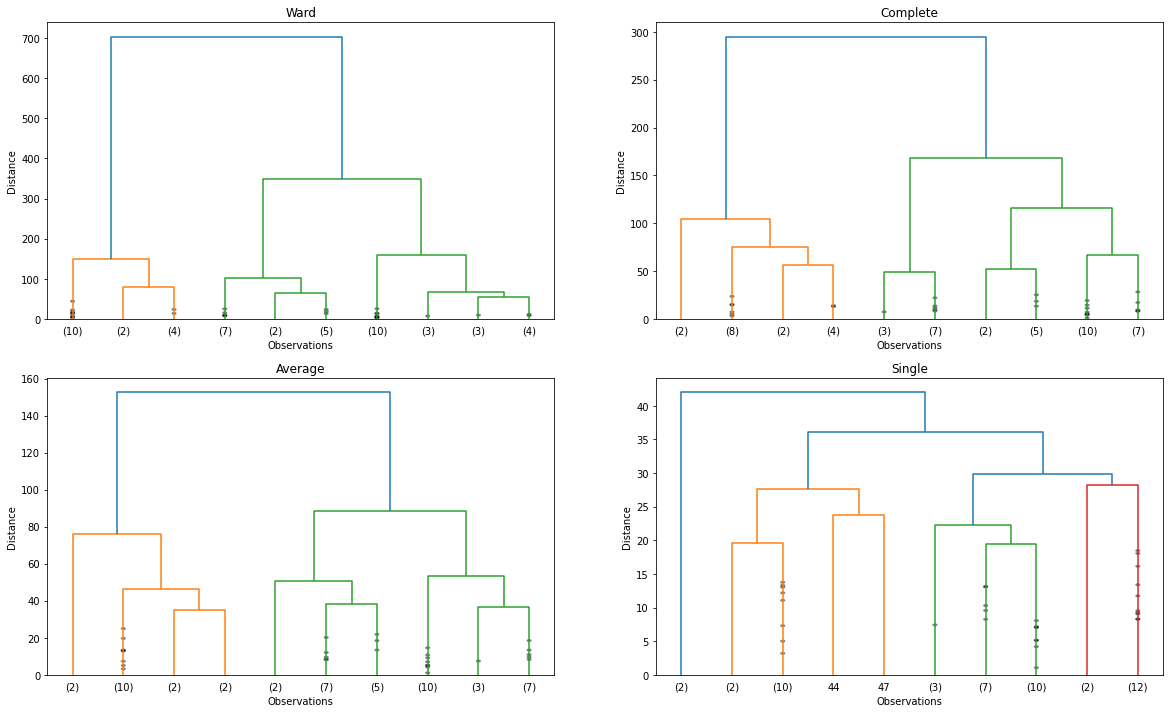

In [25]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

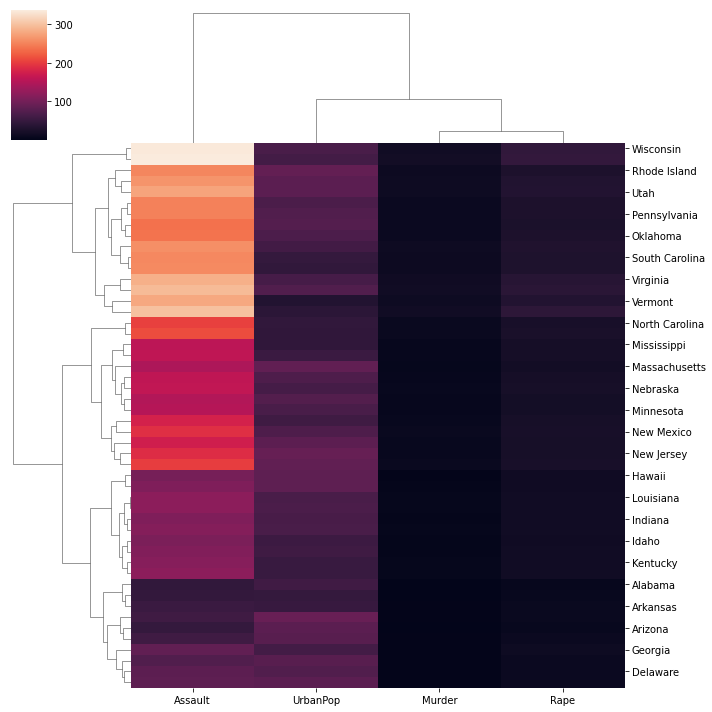

In [26]:
sns.clustermap(df);

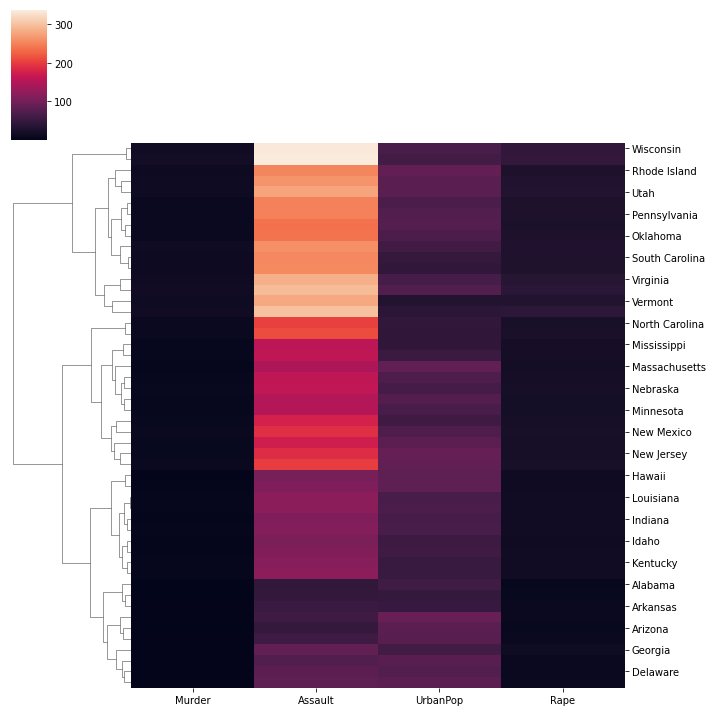

In [27]:
sns.clustermap(df,col_cluster=False);

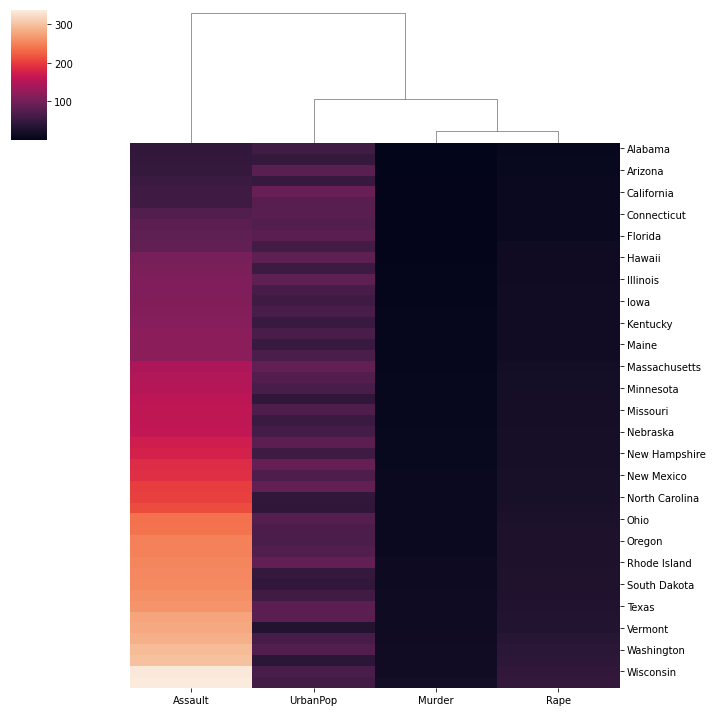

In [28]:
sns.clustermap(df, row_cluster=False);

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [29]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.5025920650864762
Silhouette Score for 5 clusters: 0.45550538459561596
Silhouette Score for 6 clusters: 0.45608767199428596
Silhouette Score for 7 clusters: 0.4616961936914634
Silhouette Score for 8 clusters: 0.45731208153497954
Silhouette Score for 9 clusters: 0.4786579894347773


In [32]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)

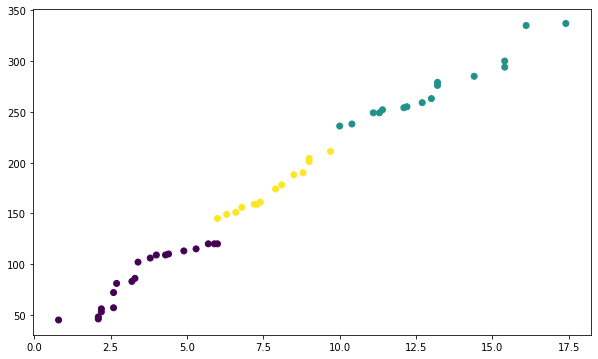

In [33]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, cmap = "viridis")

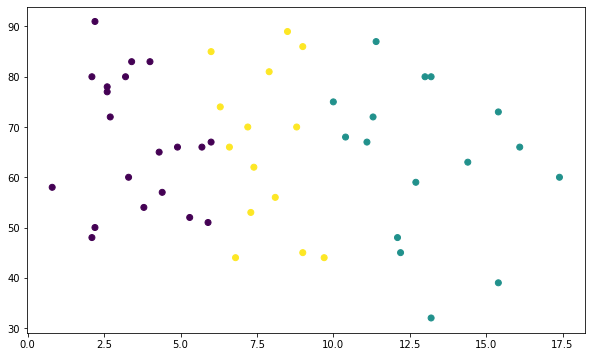

In [35]:
plt.scatter(df.iloc[:,0], df.iloc[:,2], c = clusters, cmap = "viridis")

In [36]:
df["predicted_clusters"] = clusters

In [37]:
df.groupby("predicted_clusters").mean()

,Murder,Assault,UrbanPop,Rape
predicted_clusters,,,,
0,3.575000,87.550000,66.900000,12.820000
1,13.081250,272.562500,63.375000,32.231250
2,7.757143,173.285714,66.071429,20.678571


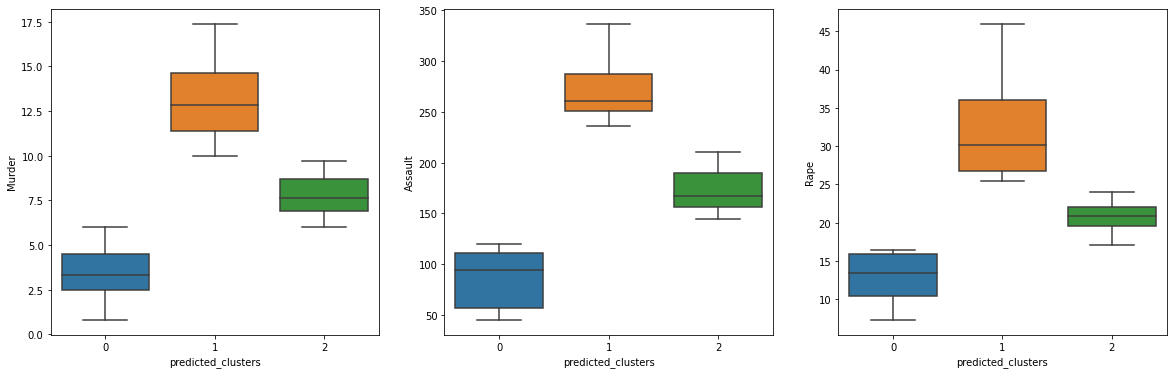

In [38]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "predicted_clusters", data = df)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "predicted_clusters", data = df)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "predicted_clusters", data = df);

In [39]:
df.predicted_clusters.value_counts()

0    20
1    16
2    14
Name: predicted_clusters, dtype: int64

**Evaluation**

- 0 : states with low crime rates
- 1 : states with high crime rates
- 2 : states with medium crime rates

In [40]:
maping = {0 : "low",
          1 : "high",
          2 : "medium"}

In [41]:
df["crime_level"] = df["predicted_clusters"].map(maping)

In [42]:
df.reset_index(inplace=True)

In [43]:
df.rename(columns={'index': 'State'}, inplace=True)

In [44]:
df.sort_values("predicted_clusters")

,State,Murder,Assault,UrbanPop,Rape,predicted_clusters,crime_level
0,Alabama,0.8,45,58,7.3,0,low
19,Maryland,6.0,120,67,16.5,0,low
18,Maine,5.9,120,51,16.4,0,low
17,Louisiana,5.7,120,66,16.3,0,low
15,Kansas,4.9,113,66,16.1,0,low
14,Iowa,4.4,110,57,15.8,0,low
13,Indiana,4.3,109,65,15.6,0,low
12,Illinois,4.0,109,83,14.9,0,low
11,Idaho,3.8,106,54,14.9,0,low
10,Hawaii,3.4,102,83,14.2,0,low


In [50]:
df.groupby("predicted_clusters")["State"].unique()[0]

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland'], dtype=object)